5. In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.

In [137]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split



In [138]:
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm


In [139]:
rng = np.random.default_rng(10)

(a) Fit a logistic regression model that uses income and balance to
predict default.

In [140]:
default = load_data('Default')

In [141]:
dlt = default

In [142]:
dlt.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [143]:
dlt[:10]

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


In [144]:
dlt.corr(numeric_only=True)

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


In [145]:
dlt.shape

(10000, 4)

In [146]:
dlt_train,dlt_test = train_test_split(dlt,test_size=500,random_state=0)

In [147]:
# allvars = default[['income','balance']]
# design = MS(allvars)
# X = design.fit_transform(default)
# y = default.default == 'Yes'
# glm = sm.GLM(y,x,family=sm.families.Binomial())

这里写的时候才发现自己还没看Ch05- !!!

In [148]:
inc_bal = MS(['income','balance'])
X_train = inc_bal.fit_transform(dlt_train)
# y_train = dlt_train['default'] 
y_train = dlt_train.default == 'Yes'
glm = sm.GLM(y_train,X_train,sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.599200,0.449000,-25.855,0.0
income,0.000021,0.000005,4.027,0.0
balance,0.005700,0.000000,24.199,0.0


(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training
observations.

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

In [149]:
X_test = inc_bal.fit_transform(dlt_test)
# D = 
y_test = dlt_test['default']

In [150]:
pred = results.predict(exog=X_test)
Label = np.array(['No']*500)
Label[pred > 0.5] = 'Yes'

In [151]:
# np.mean((y_test - Label)**2)

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.

In [152]:
np.mean(Label != y_test)

0.042

(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment
on the results obtained.

In [153]:
def eval_val_seterror(terms,
            response,
            train,
            test):
   mm = MS(terms)
   X_train = mm.fit_transform(train)
   y_train = train[response] == 'Yes'

   X_test = mm.transform(test)
   y_test = test[response]

   results = sm.GLM(y_train, X_train,sm.families.Binomial()).fit()
   test_pred = results.predict(exog=X_test)
   Label = np.array(['No']*500)
   Label[test_pred > 0.5] = 'Yes'
   
   return np.mean(Label != y_test)


In [154]:
def diff_rand_spilt_test(term,response,test_size,n):
    val_seterrot = np.zeros(n)
    for idx in range(0,n):
        dlt_train,dlt_test = train_test_split(dlt,test_size=test_size,random_state=idx)
        val_seterrot[idx] = eval_val_seterror(term,response,dlt_train,dlt_test) 
    return val_seterrot

In [155]:
# val_seterrot = np.zeros(10)
# for idx in range(0,10):
#     dlt_train,dlt_test = train_test_split(dlt,test_size=500,random_state=idx)
#     val_seterrot[idx] = eval_val_seterror(['income','balance'],'default',dlt_train,dlt_test) 
# val_seterrot

In [156]:
# diff_rand_spilt_test(['income','balance'],'default',500,200)
A = diff_rand_spilt_test(['income','balance'],'default',500,80)
# A

我想这里应该是可以写一个柱状图来展示这个结果的

In [157]:
D = pd.DataFrame(A,columns=['test error'])

array([<Axes: title={'center': 'test error'}>], dtype=object)

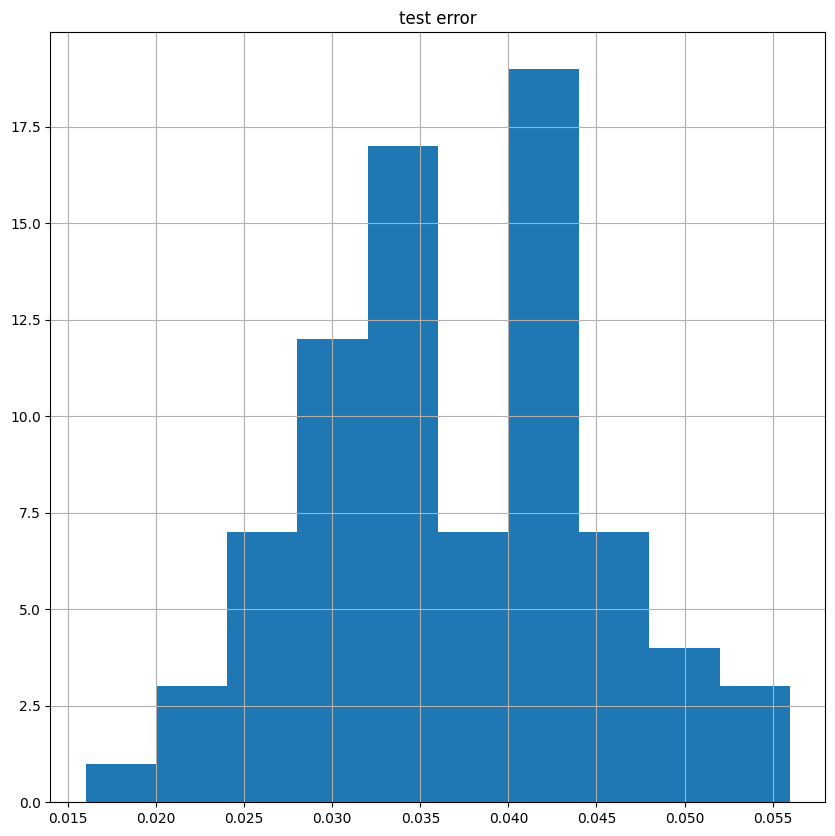

In [158]:
fig,ax = subplots(figsize=(10,10))
D.hist('test error',ax=ax)

In [159]:
np.mean(A)

0.036449999999999996

(d) Now consider a logistic regression model that predicts the probability
of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation
set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

In [160]:
# B = diff_rand_spilt_test(['income','balance','student'],'default',500,80) 
dlt[:10]

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


注意：这里直接导入dummy variable 会报错 "ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data)." 会报错！ 原因是变量 student 不是 numpy dtype ,因此需要先把 student 变为 0 or 1

In [161]:
dlt['stu01'] = np.where(dlt['student'] == 'Yes',1,0)
dlt['stu01']

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: stu01, Length: 10000, dtype: int32

In [162]:
B = diff_rand_spilt_test(['income','balance','stu01'],'default',500,10) 
A = diff_rand_spilt_test(['income','balance'],'default',500,10)

In [163]:
np.mean(B),np.mean(A)

(0.0378, 0.03760000000000001)

MY ANSWER:"B" > "A" 所以"including a
dummy variable for student leads to a reduction in the test error
rate." is NO

6. We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coefficients
in two different ways: (1) using the bootstrap, and (2) using the
standard formula for computing the standard errors in the sm.GLM()
function. Do not forget to set a random seed before beginning your
analysis.

In [164]:
allvars = dlt[['income','balance']]
design = MS(allvars)
X = design.fit_transform(default)
y = default.default == 'Yes'
glm = sm.GLM(y,X,family=sm.families.Binomial())
result = glm.fit()
result.params

intercept   -11.540468
income        0.000021
balance       0.005647
dtype: float64

(a) Using the summarize() and sm.GLM() functions, determine the
estimated standard errors for the coefficients associated with
income and balance in a multiple logistic regression model that
uses both predictors.

In [165]:
summarize(result)['std err']

intercept    0.435000
income       0.000005
balance      0.000000
Name: std err, dtype: float64

(b) Write a function, boot_fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

In [166]:
def boot_fn(model_matrix, response, D, idx):
    D_ = D.loc[idx]
    Y_ = D_[response] == 'Yes' 
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.GLM(Y_,X_,sm.families.Binomial()).fit().params


这里原来报错： "ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data)." 最后发现是在 上面这个boot_fn函数定义的时候，Y_ = D_[response] 最终被判定不为 numpy dtype,所以修改为 Y_ = D_[response] == 'Yes'

In [167]:
glm_func = partial(boot_fn, MS(['income','balance']), 'default')

In [168]:
rng = np.random.default_rng(0)
np.array([glm_func(dlt,
          rng.choice(500,
                     500,
                     replace=True)) for _ in range(10)])


array([[-9.92173486e+00,  4.17700714e-06,  5.21589873e-03],
       [-1.24148529e+01,  1.97143874e-05,  6.27899194e-03],
       [-1.42711805e+01,  1.27658732e-06,  7.61311927e-03],
       [-1.04886405e+01,  3.03166871e-05,  5.00979793e-03],
       [-1.26635199e+01,  1.22329681e-05,  6.43400573e-03],
       [-2.79603355e+01,  1.20096599e-04,  1.31551291e-02],
       [-2.14903448e+01,  8.28928548e-05,  9.95905276e-03],
       [-1.47950372e+01,  3.87247226e-05,  7.24892827e-03],
       [-1.67228653e+01,  3.06914939e-05,  8.59265238e-03],
       [-7.69198546e+00,  6.45093189e-06,  3.57927558e-03]])

(c) Following the bootstrap example in the lab, use your boot_fn()
function to estimate the standard errors of the logistic regression
coefficients for income and balance

In [169]:
def boot_SE(func,
            D,
            n=None,
            B=1000,
            seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

In [170]:
boot_SE(glm_func,dlt,B=100)

intercept    0.415783
income       0.000005
balance      0.000211
dtype: float64

(d) Comment on the estimated standard errors obtained using the
sm.GLM() function and using the bootstrap.

MY ANSWER:参考Ch05- 最后一段的论述，因为bootstrap不依靠“方法”，所以可能来说boot_SE会更加准确一些

7. In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function
can be used in order to compute the LOOCV test error estimate.
Alternatively, one could compute those quantities using just sm.GLM()
and the predict() method of the fitted model within a for loop. You
will now take this approach in order to compute the LOOCV error
for a simple logistic regression model on the Weekly data set. Recall
that in the context of classification problems, the LOOCV error is
given in (5.4).

(a) Fit a logistic regression model that predicts Direction using Lag1
and Lag2.

In [171]:
weekly = load_data('Weekly')
weekly[:10]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down


In [172]:
var1 = weekly[['Lag1','Lag2']]
X_w = MS(var1).fit_transform(weekly)
Y_w = weekly.Direction == 'Up'
glm_w = sm.GLM(Y_w,X_w,sm.families.Binomial())
res_w = glm_w.fit()
summarize(res_w)

,coef,std err,z,P>|z|
intercept,0.2212,0.061,3.599,0.000
Lag1,-0.0387,0.026,-1.477,0.140
Lag2,0.0602,0.027,2.270,0.023


(b) Fit a logistic regression model that predicts Direction using Lag1
and Lag2 using all but the first observation.

In [173]:
var1 = weekly[['Lag1','Lag2']][1:]
X_w = MS(var1).fit_transform(weekly)
Y_w = weekly.Direction == 'Up'
glm_w = sm.GLM(Y_w,X_w,sm.families.Binomial())
res_w = glm_w.fit()
summarize(res_w)

,coef,std err,z,P>|z|
intercept,0.2212,0.061,3.599,0.000
Lag1,-0.0387,0.026,-1.477,0.140
Lag2,0.0602,0.027,2.270,0.023


(c) Use the model from (b) to predict the direction of the first observation.
You can do this by predicting that the first observation
will go up if P(Direction = "Up"|Lag1, Lag2) > 0.5. Was this
observation correctly classified?

In [174]:
fir = weekly[['Lag1','Lag2']]
fir2 = np.array(fir.loc[0])
# pred_first = res_w.predict(exog=(0.816,1,572))
# pred_first = res_w.predict(exog=fir2)
# fir?
fir2
# res_w.predict?

array([0.816, 1.572])

In [175]:
pred_first = res_w.predict(exog=(0.816,1,572))


In [176]:
pred_first

array([1.])

MY ANSWER:this
observation incorrectly classified

(d) Write a for loop from i = 1 to i = n, where n is the number of
observations in the data set, that performs each of the following
steps:

i. Fit a logistic regression model using all but the ith observation
to predict Direction using Lag1 and Lag2

ii. Compute the posterior probability of the market moving up
for the ith observation.

iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.

iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.

In [222]:
# for i in range(1,n+1):
# i = 1
# var2 = weekly[['Lag1','Lag2']][:2] + weekly[['Lag1','Lag2']][100:]
lo = (weekly.index > 500)
# var2 = weekly[['Lag1','Lag2']].loc[lo]
var2 = weekly[['Lag1','Lag2']]
X_w = MS(var2).fit_transform(weekly)
x_w = X_w.loc[lo]
Y_w = weekly.Direction == 'Up'
y_w = Y_w.loc[lo]
glm_w2 = sm.GLM(y_w,x_w,sm.families.Binomial())
res_w2 = glm_w2.fit()
# summarize(res_w2)
lo?
# var1?
# var2[:10]
# weekly.shape

Type:        ndarray
String form: [False False False ...  True  True  True]
Length:      1089
File:        d:\anaconda3\envs\islp3\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-

这里本来调到已经想要跳过这题的了，但想了想还是坚持写了下去。这里的报错是"ValueError: The indices for endog and exog are not aligned" 意思是：“这个错误通常是在使用统计模型库，如Statsmodels时出现的。这个错误意味着你的模型中的因变量（endog）和自变量（exog）的索引没有对齐。在进行回归分析或其他统计建模时，确保数据集的行索引是匹配的非常重要。” 所以这里才看到不应该先给var2 loc[] 的！！！！

In [214]:
y_w.shape

(1083,)

In [215]:
X_w.shape

(1089, 3)

In [ ]:
# for i in range(1,weekly.shape[0]+1):
#     lo = (weekly.index > i & weekly.index < i)
#     var2 = weekly[['Lag1','Lag2']]
#     X_w = MS(var2).fit_transform(weekly)
#     x_w = X_w.loc[lo]
#     Y_w = weekly.Direction == 'Up'
#     y_w = Y_w.loc[lo]
#     glm_w2 = sm.GLM(y_w,x_w,sm.families.Binomial())
#     res_w2 = glm_w2.fit()
#     # summarize(res_w2)